In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [27]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn

In [4]:
path= "/content/drive/MyDrive/ML_project_datasheets/Final_code/After_tokeni_lemmati_data.csv"
data=pd.read_csv(path)

In [15]:
data.head()

,reviewText,Review_without_stopwords,After_lemmatization
0,really happy they got evangelised .. spoiler a...,really happy got evangelised spoiler alert hap...,really happy got evangelised spoiler alert hap...
1,Having lived in West New Guinea (Papua) during...,lived west new guinea papua time period covere...,lived west new guinea papua time period covere...
2,Excellent look into contextualizing the Gospel...,excellent look contextualizing gospel god sove...,excellent look contextualizing gospel god sove...
3,"More than anything, I've been challenged to fi...",anything challenged find ways share christ cul...,anything challenged find way share christ cult...
4,This is a great movie for a missionary going i...,great movie missionary going foreign country e...,great movie missionary going foreign country e...


In [6]:
data.shape

(8765549, 4)

In [16]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [17]:
Subset=data.sample(n=500000, random_state=0)

In [19]:
Subset.shape

(500000, 3)

In [20]:
pos=neg=obj=count=0

postagging = []
# Drop rows with NaN values in the 'After_lemmatization' column
Subset = Subset.dropna(subset=['After_lemmatization'])
for review in Subset['After_lemmatization']:
    list = word_tokenize(review)
    postagging.append(nltk.pos_tag(list))

In [21]:
Subset['pos_tags'] = postagging

In [22]:
Subset.head()

,reviewText,Review_without_stopwords,After_lemmatization,pos_tags
3878097,I thought it was depressing,thought depressing,thought depressing,"[(thought, NN), (depressing, VBG)]"
1390262,One of my all time favorite flicks. An adult t...,one time favorite flicks adult themed comedy d...,one time favorite flick adult themed comedy dr...,"[(one, CD), (time, NN), (favorite, JJ), (flick..."
4629692,LOVE. LOVE. LOVE. Great movie.,love love love great movie,love love love great movie,"[(love, VB), (love, NN), (love, NN), (great, J..."
6433712,The product was deliver excellent and just on ...,product deliver excellent time,product deliver excellent time,"[(product, NN), (deliver, VB), (excellent, JJ)..."
4837513,Terrific movie.,terrific movie,terrific movie,"[(terrific, JJ), (movie, NN)]"


In [23]:
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [29]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [30]:
lemmatizer = WordNetLemmatizer()
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)

    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []
    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []
#Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet.
#Synset instances are the groupings of synonymous words that express the same concept.
#Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []
    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())
    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]
    pos=neg=obj=count=0

# #################################################################################################
senti_score = []

for pos_val in Subset['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0

In [31]:
Subset['senti_score'] = senti_score

In [32]:
Subset.head()

,reviewText,Review_without_stopwords,After_lemmatization,pos_tags,senti_score
3878097,I thought it was depressing,thought depressing,thought depressing,"[(thought, NN), (depressing, VBG)]",0.125
1390262,One of my all time favorite flicks. An adult t...,one time favorite flicks adult themed comedy d...,one time favorite flick adult themed comedy dr...,"[(one, CD), (time, NN), (favorite, JJ), (flick...",1.375
4629692,LOVE. LOVE. LOVE. Great movie.,love love love great movie,love love love great movie,"[(love, VB), (love, NN), (love, NN), (great, J...",1.250
6433712,The product was deliver excellent and just on ...,product deliver excellent time,product deliver excellent time,"[(product, NN), (deliver, VB), (excellent, JJ)...",1.000
4837513,Terrific movie.,terrific movie,terrific movie,"[(terrific, JJ), (movie, NN)]",0.000


In [33]:
Subset['Overall Sentiment'] = Subset['senti_score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

In [37]:
Subset.head()

,reviewText,Review_without_stopwords,After_lemmatization,pos_tags,senti_score,Overall Sentiment
3878097,I thought it was depressing,thought depressing,thought depressing,"[(thought, NN), (depressing, VBG)]",0.125,Positive
1390262,One of my all time favorite flicks. An adult t...,one time favorite flicks adult themed comedy d...,one time favorite flick adult themed comedy dr...,"[(one, CD), (time, NN), (favorite, JJ), (flick...",1.375,Positive
4629692,LOVE. LOVE. LOVE. Great movie.,love love love great movie,love love love great movie,"[(love, VB), (love, NN), (love, NN), (great, J...",1.250,Positive
6433712,The product was deliver excellent and just on ...,product deliver excellent time,product deliver excellent time,"[(product, NN), (deliver, VB), (excellent, JJ)...",1.000,Positive
4837513,Terrific movie.,terrific movie,terrific movie,"[(terrific, JJ), (movie, NN)]",0.000,Neutral


In [34]:
count=Subset["Overall Sentiment"].value_counts()
print(count)

Positive    334196
Neutral      93398
Negative     72406
Name: Overall Sentiment, dtype: int64


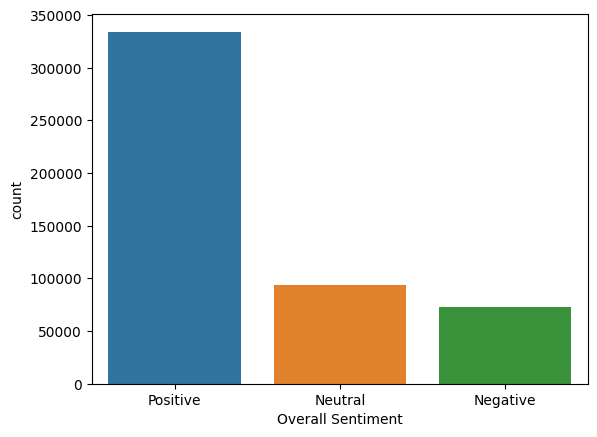

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot countplot using 'Overall Sentiment' as hue
sns.countplot(x='Overall Sentiment', data=Subset)
plt.show()

In [40]:
Subset.head()

,reviewText,Review_without_stopwords,After_lemmatization,pos_tags,senti_score,Overall Sentiment
3878097,I thought it was depressing,thought depressing,thought depressing,"[(thought, NN), (depressing, VBG)]",0.125,Positive
1390262,One of my all time favorite flicks. An adult t...,one time favorite flicks adult themed comedy d...,one time favorite flick adult themed comedy dr...,"[(one, CD), (time, NN), (favorite, JJ), (flick...",1.375,Positive
4629692,LOVE. LOVE. LOVE. Great movie.,love love love great movie,love love love great movie,"[(love, VB), (love, NN), (love, NN), (great, J...",1.250,Positive
6433712,The product was deliver excellent and just on ...,product deliver excellent time,product deliver excellent time,"[(product, NN), (deliver, VB), (excellent, JJ)...",1.000,Positive
4837513,Terrific movie.,terrific movie,terrific movie,"[(terrific, JJ), (movie, NN)]",0.000,Neutral


In [41]:
Subset.shape

(500000, 6)

In [42]:
Subset.to_csv("/content/drive/MyDrive/ML_project_datasheets/Final_code/labeled_data.csv")